Test Function


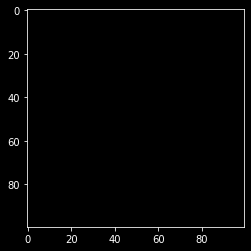

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

'''
Funzioni che devo implementare:
	- generazione	IMF  = (m/m0)^-alpha	alpha = 2
	  distrubuzione	m/m0 = IMF^(-1/alpha)
	  m in [0.1,20]
	- luminosità	L/L0 = (m/m0)^beta	beta  = 3
	- 

'''
# dimension of the matrix
N = int(1e2)
# number of stars
M = int(2e1)
# field
F = np.zeros((N,N))

# Set parameters
alpha = 2
beta  = 3
m_min = 0.1; m_max = 20

IMF = lambda m : m**(-alpha)
IMF_min = IMF(0.1); IMF_max = IMF(20) 

plt.imshow(F,cmap=plt.cm.gray)
plt.show()



0.10002210640058125 0.210076521318481


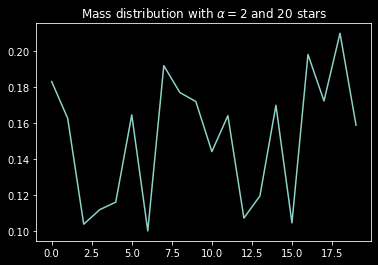

In [30]:
def random_mass(min,max):
	rnd.seed()
	imf = rnd.uniform(min,max)
	return imf**(-1/alpha)

def generate_mass_array(min,max):
	m = []
	for i in range(0,M):
		m.append(random_mass(min,max))
	return np.array(m)

m = generate_mass_array(IMF_min,IMF_max)


print(min(m), max(m))

plt.title(f'Mass distribution with $\\alpha = {alpha}$ and {M} stars')
plt.plot(m)

plt.show()



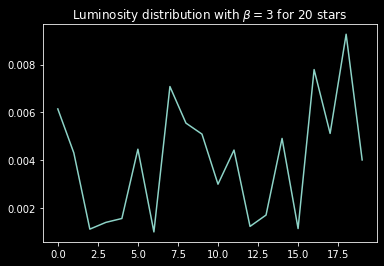

In [31]:
L = m**beta

plt.title(f'Luminosity distribution with $\\beta = {beta}$ for {M} stars')
plt.plot(L)

plt.show()

In [32]:
class star(object):
	def __init__(self,mass, lum, x ,y):
		self.m   = mass		# star mass value
		self.lum = lum		# star luminosity value
		self.x = x		# star x coordinate
		self.y = y		# star y coordinate

def star_location(n):
	X = []; Y = []
	for i in range(0,n):
		x = rnd.randint(0,N)
		y = rnd.randint(0,N)
		while((x in X) and (y in Y)):
			x = rnd.randint(0,N)
			y = rnd.randint(0,N)
		X.append(x); Y.append(y)
	X = np.array(X); Y = np.array(Y)
	return X, Y	


def initialize():
	F = np.zeros((N,N))
	m = generate_mass_array(IMF_min,IMF_max)
	L = m**beta
	xs,ys = star_location(M)
	S = star(m,L,xs,ys)
	for i in range(0,M):
		F[xs[i]][ys[i]] = L[i]
	return F, S
		
F, S = initialize()
plt.imshow(F,cmap=plt.cm.gray)
plt.show()


IndexError: index 100 is out of bounds for axis 0 with size 100